In [2]:
pip install fpdf

  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=bc3df9f9f4abd17e21620e10ace2ab3bc10d6b2cdfd0529730e1b7c5c0b5b00e
  Stored in directory: /root/.cache/pip/wheels/f9/95/ba/f418094659025eb9611f17cbcaf2334236bf39a0c3453ea455
Successfully built fpdf


''

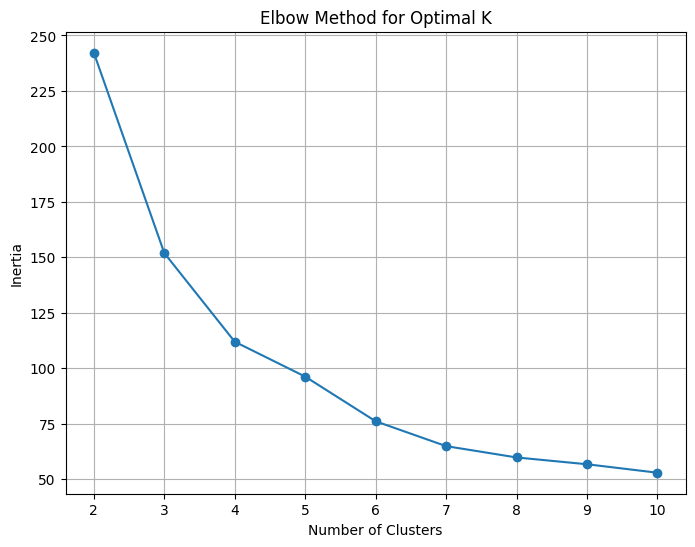

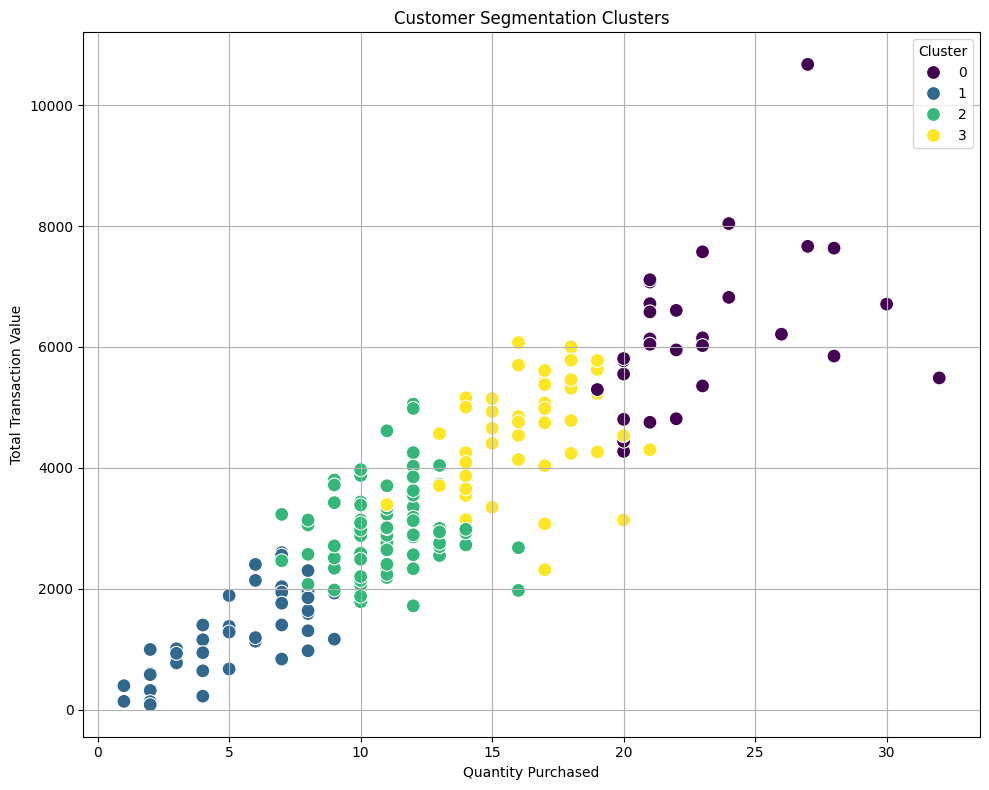

In [4]:
# Customer Segmentation using Clustering
# Importing necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")

# Aggregating transaction data for customer segmentation
customer_transaction_data = transactions.groupby('CustomerID').agg({
    'TransactionID': 'count',  # Number of transactions
    'Quantity': 'sum',        # Total quantity purchased
    'TotalValue': 'sum'       # Total transaction value
}).reset_index()

# Merging with customer profile data
customer_data = customers.merge(customer_transaction_data, on='CustomerID')

# Feature selection and scaling
features = customer_data[['TransactionID', 'Quantity', 'TotalValue']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig("elbow_method_plot.png")

# Applying KMeans with the optimal number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculating Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])

# Visualizing the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=customer_data, x='Quantity', y='TotalValue', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Quantity Purchased')
plt.ylabel('Total Transaction Value')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.savefig("customer_segmentation_clusters.png")

# Save clustering results to a PDF report
from fpdf import FPDF

pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", size=12)
pdf.cell(200, 10, txt="Customer Segmentation Report", ln=True, align='C')

pdf.ln(10)
pdf.cell(200, 10, txt=f"Number of Clusters: 4", ln=True)
pdf.cell(200, 10, txt=f"Davies-Bouldin Index: {db_index:.4f}", ln=True)
pdf.ln(10)
pdf.cell(200, 10, txt="Clustering Insights:", ln=True)

insights = [
    "1. Cluster 0 contains high-value customers with large transaction volumes.",
    "2. Cluster 1 represents customers with moderate spending and average transaction counts.",
    "3. Cluster 2 includes low-value customers with minimal transactions.",
    "4. Cluster 3 captures sporadic buyers with occasional large purchases."
]

for insight in insights:
    pdf.ln(10)
    pdf.multi_cell(0, 10, insight)

pdf.output("Aanand_Surana_Clustering.pdf")
